<div style="background-color: #3FFFF; padding: 30px;"> <div style="text-align: center;">
    <h1 style="font-family: Arial, sans-serif; font-size: 30px; font-weight: bold; text-align: center; margin: 20px 0;">Zomato Bangalore Restaurant Analysis</h1>
</div> 

<img src="https://www.xicom.biz/blog/wp-content/uploads/2017/10/Cost-Estimation-to-develop-a-Restaurant-App-like-Zomato.jpg" alt="Hero image" style="width: 100%;">

# Dataset:
https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants

## PROBLEM STATEMENT
The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the aggregate rating of each restaurant, establishment of different types of restaurant at different places, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from allover the world. With each day new restaurants opening the industry has'nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. As data scientists, we are gonna prove that given the right data anything can be predicted 

Now, we will build a model to predict the rating of restaurant based on different features using machine learning models. which will help them to find best restaurant for customers.

### FEATURES

- url:-contains the url of the restaurant in the zomato website
- address:-contains the address of the restaurant in Bengaluru 
- name:-contains the name of the restaurant
- online_order:-whether online ordering is available in the restaurant or not
- book_table:-table book option available or not
- rate:-contains the overall rating of the restaurant out of 5
- votes:-contains total number of rating for the restaurant as of the above mentioned date
- phone:-contains the phone number of the restaurant
- location:-contains the neighborhood in which the restaurant is located
- rest_type:-restaurant type
- Average Cost for two: Cost for two people 
- reviews_list: list of tuples containing reviews for the restaurant, each tuple
- menu_item: contains list of menus available in the restaurant
- listed_in(type): type of meal
- listed_in(city): contains the neighborhood in which the restaurant is listed

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
# suppress the warnings 
from warnings import filterwarnings
filterwarnings('ignore')

### LOADING DATASET

In [2]:
df = pd.read_csv(r'zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### UNDERSTANDING ABOUT THE DATASET

In [4]:
df.shape

(51717, 17)

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
votes,51717.0,283.697527,803.838853,0.0,7.0,41.0,198.0,16832.0


### CHECKING FOR DUPLICATES

In [8]:
df[df.duplicated()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


#### There is no duplicated entries that are present in the dataset

### Checking for Missing Values

In [9]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

<Axes: >

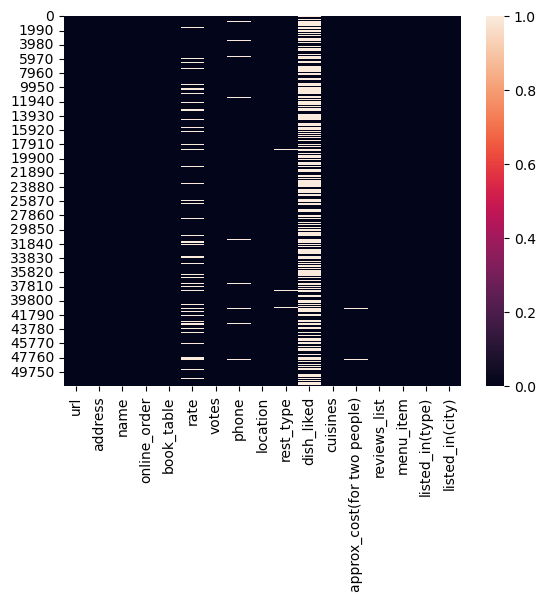

In [10]:
### Let's check for missing value
sns.heatmap(df.isnull())

In [11]:
df.count()

url                            51717
address                        51717
name                           51717
online_order                   51717
book_table                     51717
rate                           43942
votes                          51717
phone                          50509
location                       51696
rest_type                      51490
dish_liked                     23639
cuisines                       51672
approx_cost(for two people)    51371
reviews_list                   51717
menu_item                      51717
listed_in(type)                51717
listed_in(city)                51717
dtype: int64

In [12]:
df.shape[0]

51717

In [13]:
# Create a dictionary to store the information about the dataset

info_dict = { 
    
    'Column': df.columns.tolist(),    # Store the column names in a list
    
    'Non-Null Count': df.count().tolist(), # Store the count of non-null values for each column
    
    'Dtype': df.dtypes.tolist(), # Store the data types of each column
    
    'Null_Percentage' : np.round(( df.shape[0] - df.count()) * 100 / df.shape[0]) # Calculate the percentage of null values in each column
    
}

# Create a DataFrame from the info_dict dictionary

Description = pd.DataFrame(info_dict).reset_index(drop = True)

Description

,Column,Non-Null Count,Dtype,Null_Percentage
0,url,51717,object,0.0
1,address,51717,object,0.0
2,name,51717,object,0.0
3,online_order,51717,object,0.0
4,book_table,51717,object,0.0
5,rate,43942,object,15.0
6,votes,51717,int64,0.0
7,phone,50509,object,2.0
8,location,51696,object,0.0
9,rest_type,51490,object,0.0


In [14]:
Description[Description.Null_Percentage>0]

,Column,Non-Null Count,Dtype,Null_Percentage
5,rate,43942,object,15.0
7,phone,50509,object,2.0
10,dish_liked,23639,object,54.0
12,approx_cost(for two people),51371,object,1.0


In [15]:
df.menu_item.unique()

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

In [16]:
df[df.menu_item=='[]'].shape

(39617, 17)

In [17]:
df[df.menu_item=='[]'].shape[0] / df.shape[0] *100

76.60343794110254

#### According to the above information 39617 restaurant doesnot have menu, that is almost 76.60 %, so i am droping that column 

## Now will find which dish was most liked by the customers

In [18]:
all_dishes = []
for i in df.dish_liked:
    if isinstance(i,str):
        all_dishes.extend(i.split(', '))

all_dishes

['Pasta',
 'Lunch Buffet',
 'Masala Papad',
 'Paneer Lajawab',
 'Tomato Shorba',
 'Dum Biryani',
 'Sweet Corn Soup',
 'Momos',
 'Lunch Buffet',
 'Chocolate Nirvana',
 'Thai Green Curry',
 'Paneer Tikka',
 'Dum Biryani',
 'Chicken Biryani',
 'Churros',
 'Cannelloni',
 'Minestrone Soup',
 'Hot Chocolate',
 'Pink Sauce Pasta',
 'Salsa',
 'Veg Supreme Pizza',
 'Masala Dosa',
 'Panipuri',
 'Gol Gappe',
 'Onion Rings',
 'Pasta',
 'Kadhai Paneer',
 'Salads',
 'Salad',
 'Roti',
 'Jeera Rice',
 'Farmhouse Pizza',
 'Chocolate Banana',
 'Virgin Mojito',
 'Pasta',
 'Paneer Tikka',
 'Lime Soda',
 'Prawn Pizza',
 'Pizza',
 'Mocktails',
 'Coffee',
 'Nachos',
 'Salad',
 'Pasta',
 'Sandwiches',
 'Waffles',
 'Pasta',
 'Coleslaw Sandwich',
 'Choco Waffle',
 'Tacos',
 'Momos',
 'Cheese Nachos',
 'Waffles',
 'Pasta',
 'Crispy Chicken',
 'Honey Chilli Chicken',
 'Sandwich',
 'Coffee',
 'Crepe',
 'Mocktails',
 'Peri Fries',
 'Lasagne',
 'Pizza',
 'Chicken Bbq Wings',
 'Virgin Mojito',
 'Nachos',
 'Coffee',
 

In [19]:
final = pd.DataFrame(all_dishes,columns = ['items'])
final.value_counts().reset_index()

,items,count
0,Pasta,3409
1,Burgers,3024
2,Cocktails,2832
3,Pizza,2737
4,Biryani,2092
...,...,...
2787,Supreme Burger,1
2788,Doi Murgi,1
2789,Sweet Dal,1
2790,Dessert Platter,1


In [20]:
from collections import Counter
a = Counter(all_dishes)
a

Counter({'Pasta': 3409,
         'Burgers': 3024,
         'Cocktails': 2832,
         'Pizza': 2737,
         'Biryani': 2092,
         'Coffee': 1994,
         'Mocktails': 1887,
         'Sandwiches': 1676,
         'Paratha': 1566,
         'Noodles': 1415,
         'Salads': 1391,
         'Fish': 1368,
         'Nachos': 1365,
         'Chicken Biryani': 1330,
         'Beer': 1268,
         'Mutton Biryani': 1100,
         'Tea': 1039,
         'Thali': 1004,
         'Rolls': 991,
         'Waffles': 979,
         'Fries': 977,
         'Butter Chicken': 971,
         'Sea Food': 948,
         'Momos': 944,
         'Chaat': 920,
         'Sandwich': 887,
         'Roti': 866,
         'Tandoori Chicken': 866,
         'Brownie': 854,
         'Lassi': 842,
         'Hot Chocolate': 776,
         'Salad': 776,
         'Dal Makhani': 763,
         'Chicken Curry': 745,
         'Masala Dosa': 700,
         'Vegetable Biryani': 616,
         'Gulab Jamun': 605,
         'Chicken

In [21]:
final = pd.DataFrame(a.keys(),columns = ['dish'])
final['count'] = a.values()

In [22]:
final

,dish,count
0,Pasta,3409
1,Lunch Buffet,410
2,Masala Papad,150
3,Paneer Lajawab,13
4,Tomato Shorba,16
...,...,...
2787,Aloo Methi,1
2788,Burger Combo,1
2789,Chicken Stromboli,1
2790,Chicken Pepperoni,1


In [23]:
final.sort_values(by = 'count',ascending = False)

,dish,count
0,Pasta,3409
57,Burgers,3024
332,Cocktails,2832
33,Pizza,2737
83,Biryani,2092
...,...,...
2525,Onion Uttapam,1
2526,Japchae,1
2528,Smoked Pork Thali,1
2531,Stuffed Chicken Breast,1


#### According to the above information we can state that Pasta is the most favorite item which is liked by the customer and then fallowed by burgers and cocktails

## Now will find which item is most common in all the restaurants 

In [24]:
df.menu_item[df.menu_item!= '[]']

32       ['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (P...
34       ['Chole Kulcha Meal', 'Upvas Aloo Paratha With...
39       ['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...
46       ['3 Poori with Subji', 'Chole Bhature [2 Piece...
47       ['Veg Fried Rice', 'Egg Fried Rice', 'Chicken ...
                               ...                        
51664    ['Chicken Wings', 'Pepper Chicken', "Beef Gril...
51687    ['Hangover', 'Smoking Hot Red Rhino Chilli Chi...
51688    ['Dal Tadka', 'Dal Makhani', 'Paneer Tikka Mas...
51693    ['Chicken Manchow Soup', 'Chicken Lollipop', '...
51694    ['Chilli Paneer Black Pepper China Box', 'Chil...
Name: menu_item, Length: 12100, dtype: object

In [25]:
all_items = []
for i in df.menu_item[df.menu_item!= '[]']:
    if isinstance(i,str):
        all_items.extend(i.split(', '))

all_items

["['Chocolate Fantasy (Pack Of 5)'",
 "'Pan Cake (Pack Of 6)'",
 "'Gulab Jamun (Pack Of 10)'",
 "'Gulkand Shot (Pack Of 5)'",
 "'Chocolate Decadence (Pack of 2)'",
 "'CheeseCake (Pack Of 2)'",
 "'Red Velvet Slice Cake (Pack of 2)'",
 "'Red Velvet Slice Cake & Cheese Cake (Pack of 2)'",
 "'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)'",
 "'Hazelnut Brownie (Pack of 2)'",
 "'Moments'",
 "'Red Velvet Cake With Butter Cream Frosting (750 Gm)'",
 "'Red Velvet Slice Cake (Pack of 2)'",
 "'Red Velvet Slice Cake & Cheese Cake (Pack of 2)'",
 "'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)'",
 "'Red Velvet Slice Cake (Pack of 1)'",
 "'Valentine Red Velvet Jar'",
 "'Valentine Chocolate Jar'",
 "'Valentines Jar Combo'",
 "'Pink Guava 500 ML'",
 "'Oreo Vanilla 500 ML'",
 "'Cookie Crumble 500 ML'",
 "'Chocolate Fantasy'",
 "'Gulkand-E-Bahar'",
 "'Pan Cake'",
 "'Hazelnut Brownie (Pack Of 1)'",
 "'Gulab Jamun (Pack Of 2)'",
 "'Plum Cake'",
 "'Red Velvet Cake With Butter

In [26]:
final_items = pd.DataFrame(all_items,columns = ['items'])
final_items = final_items.value_counts().reset_index()
final_items

,items,count
0,'Chicken Fried Rice',4393
1,'Veg Fried Rice',4224
2,'Paneer Butter Masala',3805
3,'Jeera Rice',3703
4,'Egg Fried Rice',3388
...,...,...
141890,'Fruit Salad Custard with Ice Cream',1
141891,'Pyaaz Aloo Mixed Parota [2 Pieces]',1
141892,'Fruit Roll [1 kg]',1
141893,'Pyaaz Kulcha Meal [Serves 1]',1


### Most common items in most of the restaurant are Chicken Fried Rice, followed by Veg Fried Rice and Paneer Butter Masala

In [27]:
df.location.value_counts()

location
BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

### New Analysis 

### Analysing items that were not in menu of BTM Location

In [28]:
BTM_data = df[(df.location == 'BTM')&(df.menu_item != '[]')]
BTM_data.shape

(1637, 17)

In [29]:
BTM_data.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
879,https://www.zomato.com/bangalore/sankranthi-ve...,"986, 1st Block, Vijaya Bank Layout, 4th Stage,...",Sankranthi Veg Restaurant,Yes,No,3.0/5,102,+91 8095275614,BTM,Casual Dining,"Tea, Vada Sambar, Masala Dosa","South Indian, North Indian, Chinese",600,"[('Rated 3.0', ""RATED\n So we ended up here o...","['Jeera Rice', 'Veg Pulao', 'Veg Hyderabadi Bi...",Buffet,Bannerghatta Road
924,https://www.zomato.com/bangalore/capsicum-fami...,"774, 3rd Floor, 16th Main, 7th Cross, 2nd Stag...",Capsicum Family Restaurant,Yes,No,3.8/5,254,080 49652641,BTM,Casual Dining,Mutton Biryani,"Biryani, North Indian",800,"[('Rated 5.0', 'RATED\n The best biryani plac...","['Gobi Manchurian', 'Tandoori Chicken', 'Phulk...",Delivery,Bannerghatta Road


In [30]:
import ast

all_items = []
for i in df.menu_item[df.menu_item != '[]']:
    if isinstance(i, str):
        items = ast.literal_eval(i) 
        all_items.extend(items)  

all_items

['Chocolate Fantasy (Pack Of 5)',
 'Pan Cake (Pack Of 6)',
 'Gulab Jamun (Pack Of 10)',
 'Gulkand Shot (Pack Of 5)',
 'Chocolate Decadence (Pack of 2)',
 'CheeseCake (Pack Of 2)',
 'Red Velvet Slice Cake (Pack of 2)',
 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)',
 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)',
 'Hazelnut Brownie (Pack of 2)',
 'Moments',
 'Red Velvet Cake With Butter Cream Frosting (750 Gm)',
 'Red Velvet Slice Cake (Pack of 2)',
 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)',
 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)',
 'Red Velvet Slice Cake (Pack of 1)',
 'Valentine Red Velvet Jar',
 'Valentine Chocolate Jar',
 'Valentines Jar Combo',
 'Pink Guava 500 ML',
 'Oreo Vanilla 500 ML',
 'Cookie Crumble 500 ML',
 'Chocolate Fantasy',
 'Gulkand-E-Bahar',
 'Pan Cake',
 'Hazelnut Brownie (Pack Of 1)',
 'Gulab Jamun (Pack Of 2)',
 'Plum Cake',
 'Red Velvet Cake With Butter Cream Frosting (750 Gm)',
 'Chocolate Mud Cake (700 Gms)'

In [31]:
import ast

all_items_BTM = []
for i in BTM_data.menu_item:
    if isinstance(i, str):
        items = ast.literal_eval(i) 
        all_items_BTM.extend(items)

all_items_BTM

['Jeera Rice',
 'Veg Pulao',
 'Veg Hyderabadi Biryani',
 'Paneer Biryani',
 'Mushroom Biryani',
 'Curd Rice',
 'Tawa Pulao',
 'Dal Khichdi',
 'Plain Roti',
 'Butter Naan',
 'South Indian Meals',
 'South Indian Deluxe Meal',
 'North Meals',
 'North Delux Meal',
 'Channa Bhatura Meal',
 'South Indian Meals',
 'South Indian Deluxe Meal',
 'North Meals',
 'North Delux Meal',
 'Channa Bhatura Meal',
 'Cream Of Tomato Soup',
 'Sweet Corn Plain Soup',
 'Sweet Corn Veg Soup',
 'Veg Clear Soup',
 'Manchow Soup',
 'Hot and Sour Soup',
 'Sweet Corn Mushroom Soup',
 'Cream Of Mushroom Soup',
 'Lemon Coriander Soup',
 'French Onion Soup',
 'Sankranthi Special Soup',
 'Plain Roti',
 'Butter Roti',
 'Methi Roti',
 'Pudina Roti',
 'Plain Kulcha',
 'Butter Kulcha',
 'Stuffed Kulcha',
 'Cheese Kulcha',
 'Onion Kulcha',
 'Garlic Kulcha',
 'Chilly Garlic Kulcha',
 'Chilly Kulcha',
 'Plain Naan',
 'Butter Naan',
 'Garlic Naan',
 'Chilly Garlic Naan',
 'Stuffed Naan',
 'Cheese Naan',
 'Jeera Rice',
 'Veg Pu

In [32]:
set_all_items = set(all_items)
set_all_items

{'Stir Fry Vegetable',
 'Kaju Mango Dry Fruit Roll',
 'Golden Chicken',
 'Vegetable Roast',
 'Carrot Juice',
 'Pejo Egg Soup',
 'Chicken Lemon Dry',
 'Veg Cheese Kati Roll',
 'Dates Thick Shake',
 'Idlli Mamsam Pulusu',
 'Navrathna Jal Fry',
 'Special Chicken Kabab Biryani [Full]',
 'Combo- Oreo Rich Cake with Basket of Bouquet Flowers',
 'Non Veg Biryani Combo',
 'Coffee Mocha Cake [500 grams]',
 'Dates Nuts Shake',
 'Guava Glow',
 'Kandaari Kabab',
 'Chicken Gnocchi',
 'Creamy Mushroom Risotto',
 'Hot Cake Fudge',
 'Coffee Almond Ice Cream [1 Scoop]',
 'Jamaica',
 'Chuduwa',
 'Schezwan Chicken Triple Rice',
 'Honey Ginger Lemon Chai',
 'Spicy Tangy Chicken Wings',
 'Bengal Fish Curry',
 'Blueberry Milkshake with Dry Fruits',
 'Anjura Special Cone',
 'Mix Veg Thai Chili Basil Gravy',
 'Silver Fish Oil Fry',
 'Scrambled Eggs Masala',
 'Crispy Corn Fry',
 'Dragon Chopsuey (veg)',
 'Paneer Hot Garlic Momos',
 'Boneless Medium Spicy Chicken Patiala',
 'Thalappakatti Kola Biryani',
 'Chana

In [33]:
set_all_items_BTM = set(all_items_BTM)
set_all_items_BTM

{'German Omelette with Bacon',
 'Golden Chicken',
 'Papaya Fresh Juice',
 'Mediterranean Farm Fresh Veg',
 'Carrot Juice',
 'Cheesy Chicken Meatballs',
 'Full Loaded Veg and Paneer Sandwich',
 'Lemon Coriander Soup',
 'Chicken Mushroom Cream Soup',
 'Double Mutton Double Egg Roll',
 'Schezwan Chicken Rice with Chilli Chicken Gravy',
 'Chinese Platter',
 'Chicken Majistic Dry',
 'Veg Package 3 [Serves 8-10]',
 'Musambi juice',
 'Chicken Spring Roll',
 'Dates Thick Shake',
 'Veg Dum Biryani Combo',
 'Dates Nuts Shake',
 'Guava Glow',
 'Boneless Chicken Kasturi Kebab [4 Pieces]',
 'Chilly Garlic Grilled Chicken',
 'Chicken',
 'Roti-Sabji',
 '3 Ney Pathal',
 'Badam Milk with Potato Garlic Shots',
 'Angara Tandoori Chicken Chipotle Sub',
 'Pothu Biryani [Beef]',
 'Sprout Chaat',
 'Cauliflower Manchurian',
 'Falooda Lemon Juice',
 'Lamb Fried Rice',
 'Chikoo Ice Cream',
 'Bread Omelette with French Fries',
 'Paneer Oyster Dry',
 'Banana Juice',
 'Original Biryani Combo - Fish + Prawns',
 'Ve

In [34]:
unique_items_BTM = list(set_all_items - set_all_items_BTM)
unique_items_BTM

['Stir Fry Vegetable',
 'Vegetable Roast',
 'Special Chicken Kabab Biryani [Full]',
 'Kandaari Kabab',
 'Chicken Gnocchi',
 'Honey Ginger Lemon Chai',
 'Spicy Tangy Chicken Wings',
 'Blueberry Milkshake with Dry Fruits',
 'Anjura Special Cone',
 'Mix Veg Thai Chili Basil Gravy',
 'Silver Fish Oil Fry',
 'Scrambled Eggs Masala',
 'Boneless Medium Spicy Chicken Patiala',
 'Slender Juice',
 'Cantonese Chicken Chowmein',
 'Seem Aloo Bhaja',
 'Salted Fresh Lime Juice [250 ml]',
 'Strawberry Choco Wonder Tower Sundae',
 'Veg Leppu Rice',
 'Veg Lentil and Spinach Quesadilla',
 'Naturally Chocolate MilkShake (300ml)',
 'Starwberry Ice Cream',
 'Vanilla Choco Chip Cake [1 kg]',
 'Boneless Murg Miya',
 'Doodh Wali Kadak Chai - Capacity 500 ml',
 'Special Chicken Kosha with Moong Dal Tadka Combo',
 'Prawn Fried Rice in Coriander and Chilly Sauce',
 'Butter Makki Roti',
 'Baby Corn Golden',
 'Oreo Freak',
 'Chicken Kastoori',
 'Cookies and Cream Cupcake',
 'Veggie Oats Cheela',
 'Satay Chicken Ske

In [35]:
'Pasta' not in set_all_items_BTM

True

In [36]:
len(all_dishes)

128848

In [37]:
len(set(all_dishes))

2792

In [38]:
len(set(set_all_items_BTM))

19016

In [39]:
common_items_not_in_BTM = set(all_dishes).intersection(set(unique_items_BTM))

In [40]:
common_items_not_in_BTM = pd.DataFrame(common_items_not_in_BTM,columns = ['items'])

In [41]:
common_items_not_in_BTM.shape

(981, 1)

In [42]:
common_items_not_in_BTM.head(2)

,items
0,Veg Dosa
1,Choco Mocha


In [43]:
final = pd.merge(left = common_items_not_in_BTM,right = final_items,on = 'items')

In [44]:
final.sort_values('count',ascending = False)

,items,count
0,Roast Chicken,3
1,Spicy Paneer,2


In [45]:
final[final['items'] == 'Pasta']

,items,count


In [46]:
final_items

,items,count
0,'Chicken Fried Rice',4393
1,'Veg Fried Rice',4224
2,'Paneer Butter Masala',3805
3,'Jeera Rice',3703
4,'Egg Fried Rice',3388
...,...,...
141890,'Fruit Salad Custard with Ice Cream',1
141891,'Pyaaz Aloo Mixed Parota [2 Pieces]',1
141892,'Fruit Roll [1 kg]',1
141893,'Pyaaz Kulcha Meal [Serves 1]',1


In [47]:
len(unique_items_BTM)

116940

In [48]:
len(set_all_items)

135956

In [49]:
len(set_all_items_BTM)

19016

In [50]:
df.menu_item.iloc[32]

"['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'CheeseCake (Pack of 1)', 

In [51]:
'Chicken Fried Rice' in ['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'CheeseCake (Pack of 1)', 'Chocolate Decadence (Pack of 1)', 'Red Velvet Slice Cake (Pack of 1)']

False

In [52]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


### Removing the unnecessary columns 

In [53]:
new_df = df.copy(deep = True)

In [54]:
df=df.drop(['url','address','phone','reviews_list','menu_item','dish_liked'],axis=1)
df.shape

(51717, 11)

In [55]:
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari


#### Again checking for duplicate values

In [56]:
df[df.duplicated()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
596,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,Dine-out,Banashankari
2235,Shiv Sagar,No,No,3.6/5,10,Bannerghatta Road,Food Court,"South Indian, Beverages",400,Dine-out,Bannerghatta Road
3763,The Fisherman's Wharf,Yes,Yes,4.4/5,4099,Sarjapur Road,"Casual Dining, Bar","Seafood, Goan, North Indian, Continental, Asian","1,400",Buffet,Bellandur
4339,Biryani Treat,No,No,NaN,0,Bellandur,Quick Bites,Biryani,400,Delivery,Bellandur
4949,OPUS Club,No,Yes,4.4/5,1496,Sarjapur Road,Pub,"Continental, Italian, North Indian, Mexican","1,900",Drinks & nightlife,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...
49193,Sri Ganesh Juice Junction,Yes,No,3.5 /5,6,Bellandur,Beverage Shop,"Juices, Fast Food",200,Delivery,Sarjapur Road
49432,Biryani Treat,No,No,NaN,0,Bellandur,Quick Bites,Biryani,400,Delivery,Sarjapur Road
50379,House Of Candy,Yes,No,NaN,0,Whitefield,Confectionery,Desserts,200,Delivery,Whitefield
50405,House Of Candy,Yes,No,NaN,0,Whitefield,Confectionery,Desserts,200,Delivery,Whitefield


#### we can see that now we got 108 duplicated values, so we are removing those duplicate values

In [57]:
df.drop_duplicates(inplace=True)
df.shape

(51609, 11)

### Data cleaning 

convert datatype of rate and cost2plates       
We know that the Ratings given in the Column Rate are given out of five so instead of writing with /5 extra stuff better to write the rating itself and removing the /5 part

In [58]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

We can see from the above that 'NEW' & '-' is of the type other than that of float and nan

In [59]:
# Replace New & - with null 

df.rate = df.rate.replace({"NEW":np.nan,'-':np.nan})

In [60]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [61]:
# Now will remove '/5' by empty ('')

df['rate'] = df['rate'].astype(str) # Converting the rating to the String type from the float type first
df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))
df['rate'] = df['rate'].apply(lambda x: float(x)) # Converting the rating to the Float type from the String type 
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [62]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [63]:
df.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                           10019
votes                              0
location                          21
rest_type                        227
cuisines                          45
approx_cost(for two people)      344
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [64]:
df.shape

(51609, 11)

# Instead of treating the null value, its better to drop those null values because its not good to impute the rating of the customers

In [65]:
df.dropna(inplace=True)
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

### FEATURE HANDLING

In [66]:
df.rename(columns={'approx_cost(for two people)':'Cost2plates', 'listed_in(type)': 'Type' , 'listed_in(city)':'City'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41190 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41190 non-null  object 
 1   online_order  41190 non-null  object 
 2   book_table    41190 non-null  object 
 3   rate          41190 non-null  float64
 4   votes         41190 non-null  int64  
 5   location      41190 non-null  object 
 6   rest_type     41190 non-null  object 
 7   cuisines      41190 non-null  object 
 8   Cost2plates   41190 non-null  object 
 9   Type          41190 non-null  object 
 10  City          41190 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.8+ MB


In [67]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'Electronic City', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Koramangala 7th Block', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramangala 6th Block', 'Ma

In [68]:
df['City'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

### As we can see that loaction and city columns both have same information so keep only one column location and remove city 

In [69]:
df=df.drop(['City'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41190 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41190 non-null  object 
 1   online_order  41190 non-null  object 
 2   book_table    41190 non-null  object 
 3   rate          41190 non-null  float64
 4   votes         41190 non-null  int64  
 5   location      41190 non-null  object 
 6   rest_type     41190 non-null  object 
 7   cuisines      41190 non-null  object 
 8   Cost2plates   41190 non-null  object 
 9   Type          41190 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.5+ MB


In [70]:
df.Cost2plates.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

In [71]:
# Now will remove ',' by empty ('')

df['Cost2plates'] = df['Cost2plates'].astype(str)
df['Cost2plates'] = df['Cost2plates'].apply(lambda x: x.replace(',',''))
df['Cost2plates'] = df['Cost2plates'].astype(float)

In [72]:
df.Cost2plates.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199., 1100., 1600.,  230.,  130.,
       1700., 1350., 2200., 1400., 2000., 1800., 1900.,  180.,  330.,
       2500., 2100., 3000., 2800., 3400.,   50.,   40., 1250., 3500.,
       4000., 2400., 2600., 1450.,   70., 3200.,  240., 6000., 1050.,
       2300., 4100.,  120., 5000., 3700., 1650., 2700., 4500.,   80.])

### Numerical Columns

In [73]:
num_col = [col for col in df.columns if df[col].dtypes!='O' ]

### Outlier Detection

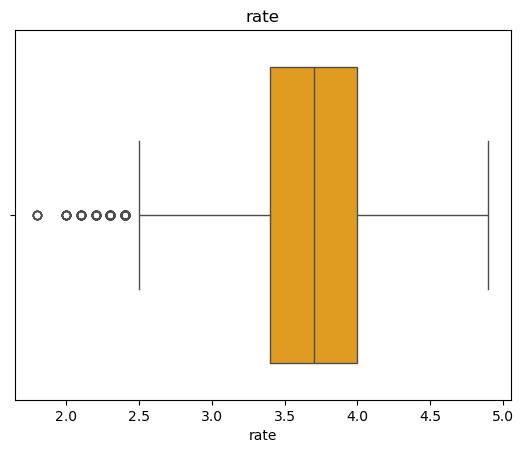

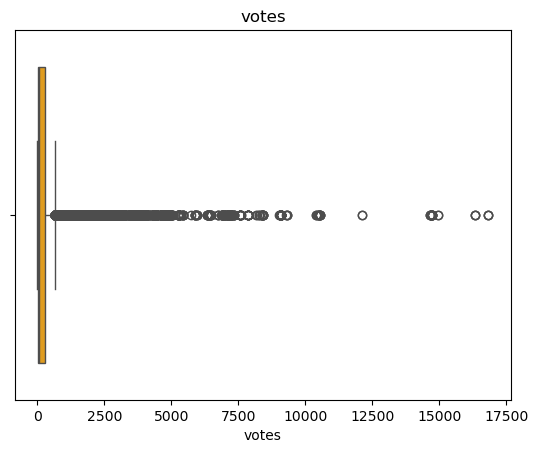

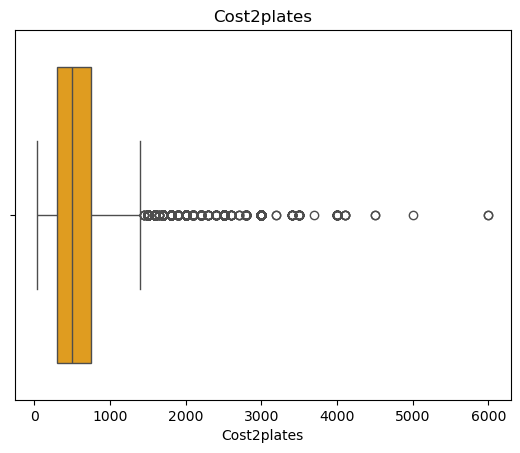

In [74]:
for col in num_col:
    plt.title(col)
    sns.boxplot(x = df[col],color="Orange")
    plt.show()

In [75]:
#As we can see there are very less value in some restaurant so we make cluster for that restaurant

df['rest_type'].value_counts()

rest_type
Quick Bites                   13861
Casual Dining                  9597
Cafe                           3365
Dessert Parlor                 1848
Delivery                       1666
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Bakery, Beverage Shop             1
Quick Bites, Kiosk                1
Name: count, Length: 87, dtype: int64

In [76]:
rest_types=df['rest_type'].value_counts(ascending=False)
rest_types

rest_type
Quick Bites                   13861
Casual Dining                  9597
Cafe                           3365
Dessert Parlor                 1848
Delivery                       1666
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Bakery, Beverage Shop             1
Quick Bites, Kiosk                1
Name: count, Length: 87, dtype: int64

In [77]:
rest_type_lessthan1000=rest_types[rest_types<1000]
rest_type_lessthan1000

rest_type
Bakery                        704
Bar                           640
Beverage Shop                 638
Food Court                    496
Bar, Casual Dining            381
                             ... 
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Dessert Parlor, Kiosk           2
Bakery, Beverage Shop           1
Quick Bites, Kiosk              1
Name: count, Length: 80, dtype: int64

### Making rest_type less than 1000 as others

In [78]:
def handle_rest_type(value):
  if(value in rest_type_lessthan1000 ):
        return 'others'
  else: 
      return value
df['rest_type']=df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

rest_type
Quick Bites           13861
Casual Dining          9597
others                 8490
Cafe                   3365
Dessert Parlor         1848
Delivery               1666
Takeaway, Delivery     1276
Casual Dining, Bar     1087
Name: count, dtype: int64

### Creating Location Columns

In [79]:
df['location'].value_counts()

location
BTM                      3873
Koramangala 5th Block    2295
HSR                      1992
Indiranagar              1795
JP Nagar                 1710
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: count, Length: 92, dtype: int64

### Making location count less than 300 as others

In [80]:
location=df['location'].value_counts(ascending=False)
location_lessthan300=location[location<300]
def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value
df['location']=df['location'].apply(handle_location)
df['location'].value_counts()

location
others                   4667
BTM                      3873
Koramangala 5th Block    2295
HSR                      1992
Indiranagar              1795
JP Nagar                 1710
Jayanagar                1634
Whitefield               1568
Marathahalli             1407
Bannerghatta Road        1224
Koramangala 7th Block    1053
Koramangala 6th Block    1052
Brigade Road             1048
Bellandur                 996
Sarjapur Road             852
Koramangala 1st Block     851
Ulsoor                    843
Koramangala 4th Block     841
Electronic City           832
MG Road                   792
Banashankari              744
Kalyan Nagar              692
Malleshwaram              641
Richmond Road             603
Residency Road            601
Basavanagudi              595
Frazer Town               563
Church Street             543
Brookefield               543
New BEL Road              506
Kammanahalli              492
Lavelle Road              476
Cunningham Road           474
B

### Making Cuisines count less than 100 as others

In [81]:
cuisines=df['cuisines'].value_counts(ascending=False)
cuisines_lessthan100=cuisines[cuisines<100]
def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
df['cuisines']=df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

cuisines
others                                23103
North Indian                           2107
North Indian, Chinese                  1949
South Indian                           1231
Cafe                                    620
                                      ...  
Chinese, Thai, Momos                    110
North Indian, Chinese, Continental      105
Andhra, Biryani                         104
Italian, Pizza                          101
Cafe, Bakery                            100
Name: count, Length: 62, dtype: int64

### Now will perform countplot of various location

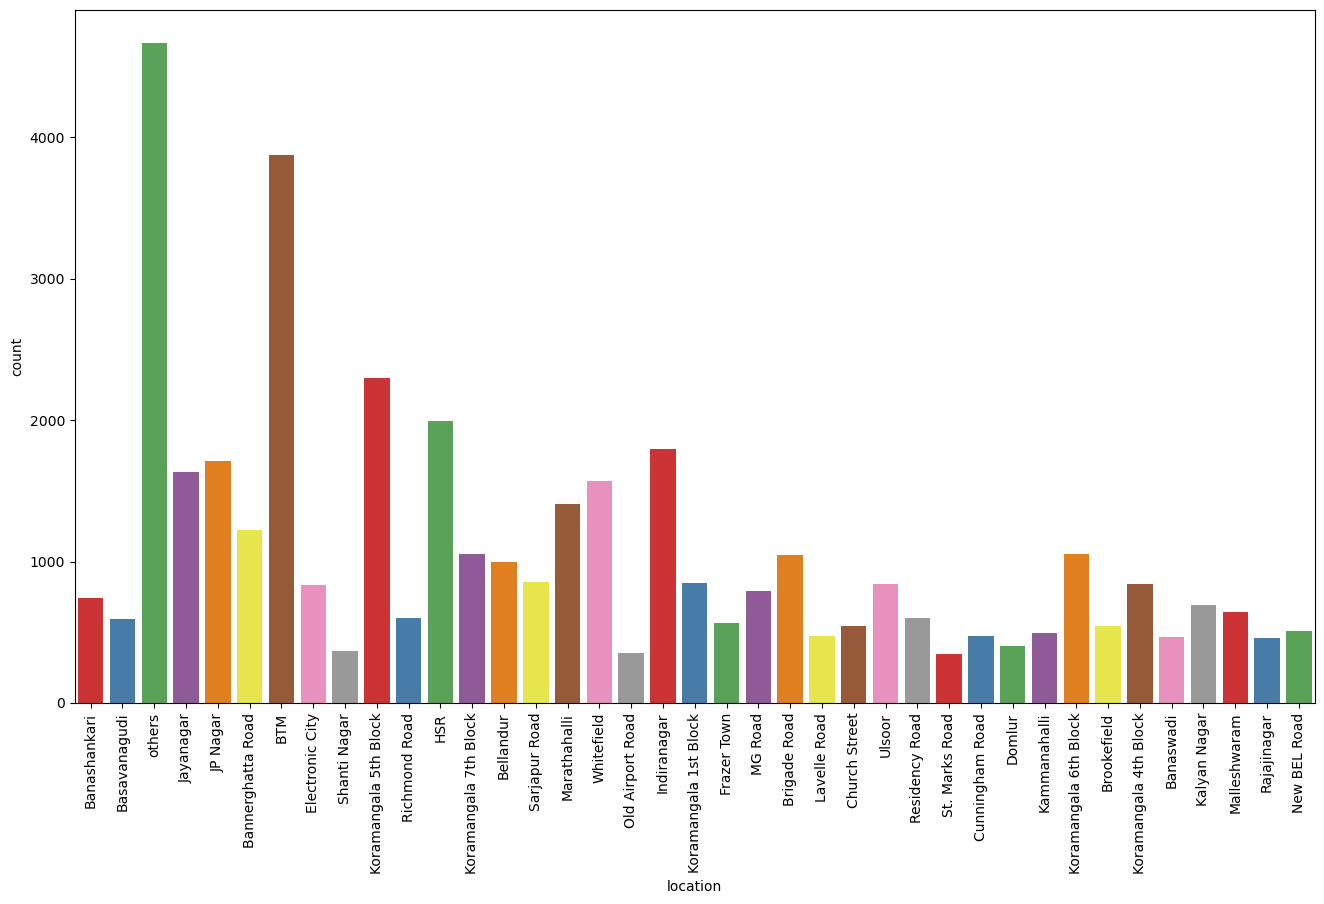

In [82]:
plt.figure(figsize=(16,9))
sns.countplot(x = 'location',data = df,palette='Set1')
plt.xticks(rotation=90)
plt.show()

#### So we can see that more no. of restaurant's are present in BTM, So by this we understood that we should not open restaurant at BTM rather than i can open at old airport road  or st. Marks road because there is less restaurant, so there is a chances that my business can grow

Text(0.5, 1.0, 'Restaurants provides Table Booking or Not')

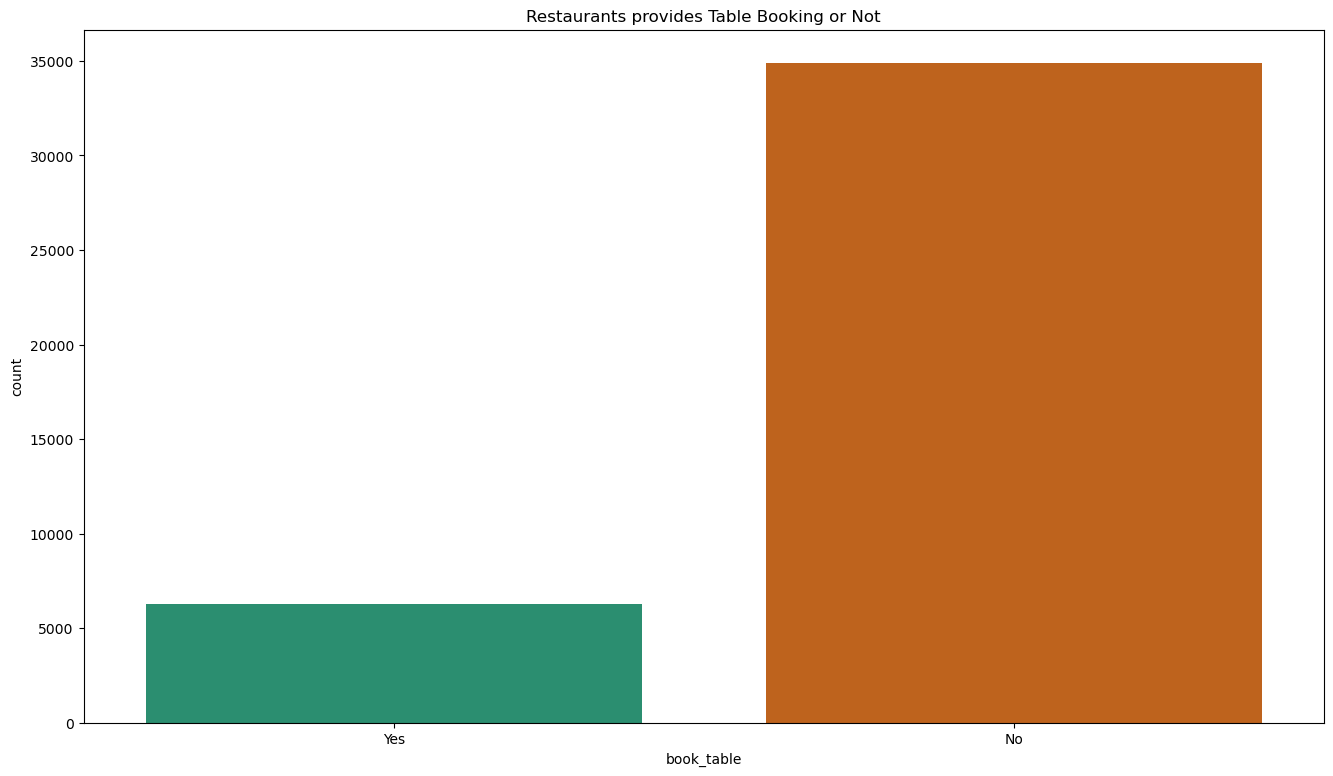

In [83]:
##plot of the restaurants that provide table booking or not
 
plt.figure(figsize=(16,9))
sns.countplot(x = 'book_table', data = df,palette='Dark2')
plt.title('Restaurants provides Table Booking or Not')

Text(0.5, 1.0, 'Restaurants delivering online or Not')

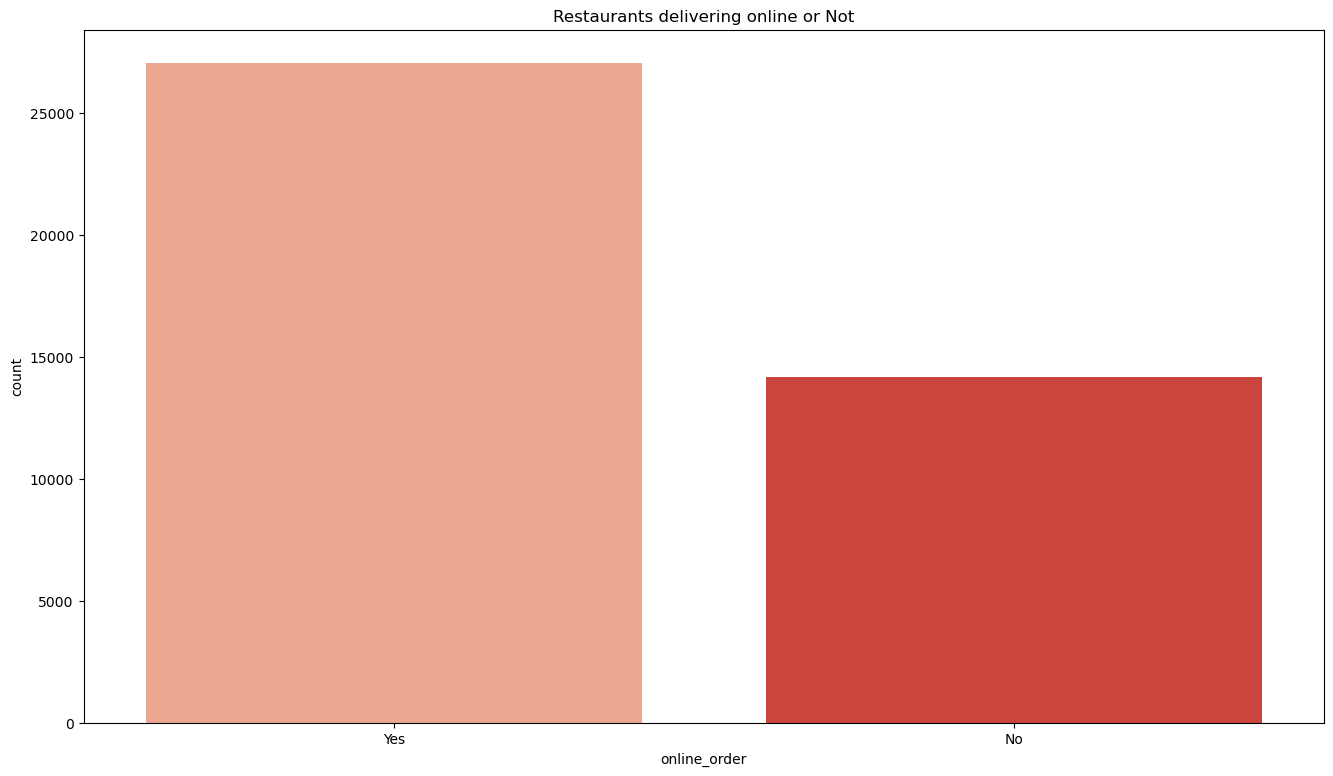

In [84]:
# Plot of the Restaurant, whether they are accepting the online_order or not 

plt.figure(figsize=(16,9))
sns.countplot(x = 'online_order', data = df,palette='Reds')
plt.title('Restaurants delivering online or Not')

The above Plot indicates that a large segments of the Restaurant are having online facility and most of them are not having online order facility

In [85]:
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet


### Now will perform bi-variate analysis

In [86]:
# comparing online orders vs average rating

df.groupby('online_order')['rate'].mean()

online_order
No     3.659538
Yes    3.723796
Name: rate, dtype: float64

<Axes: xlabel='online_order', ylabel='rate'>

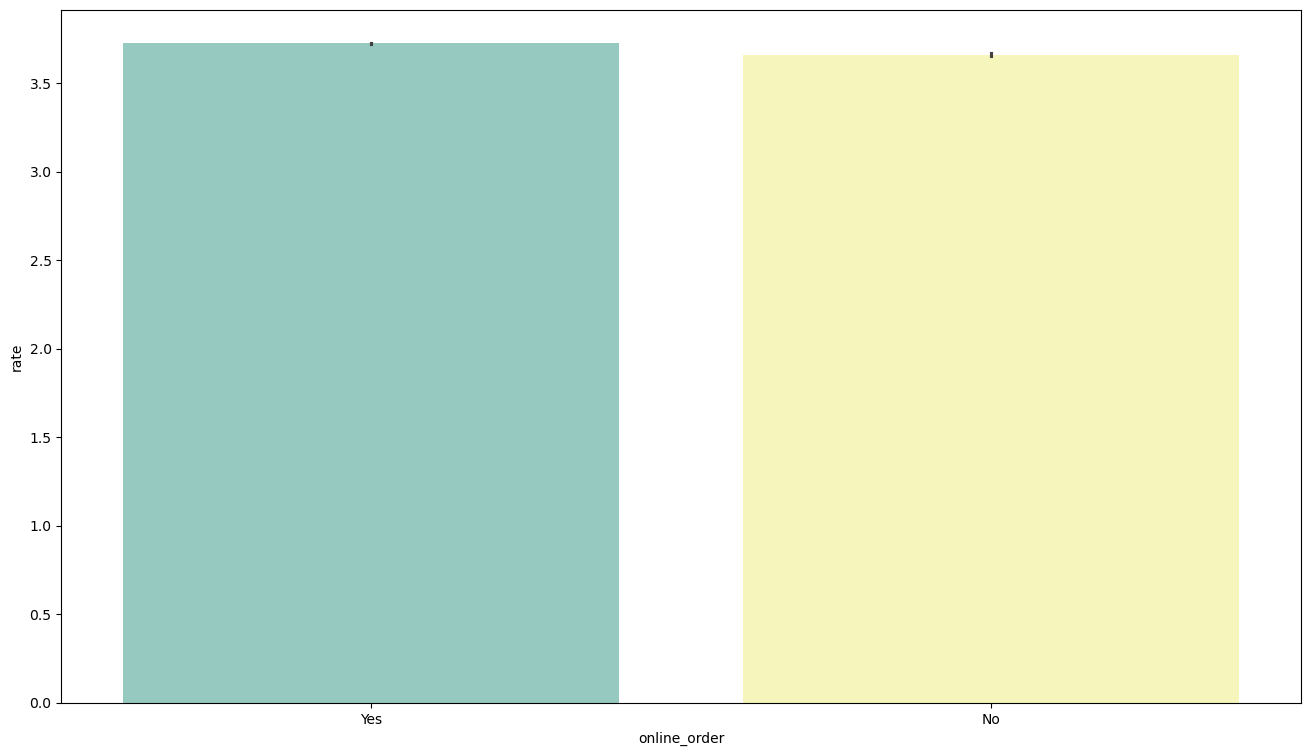

In [87]:
plt.figure(figsize=(16,9))
sns.barplot(x='online_order',y='rate',data=df,palette='Set3')

#### The restaurant which allows for online ordering has highest rating that is 3.7

In [88]:
# comparing Table booking vs average rating

df.groupby('book_table')['rate'].mean()

book_table
No     3.622380
Yes    4.143251
Name: rate, dtype: float64

<Axes: xlabel='book_table', ylabel='rate'>

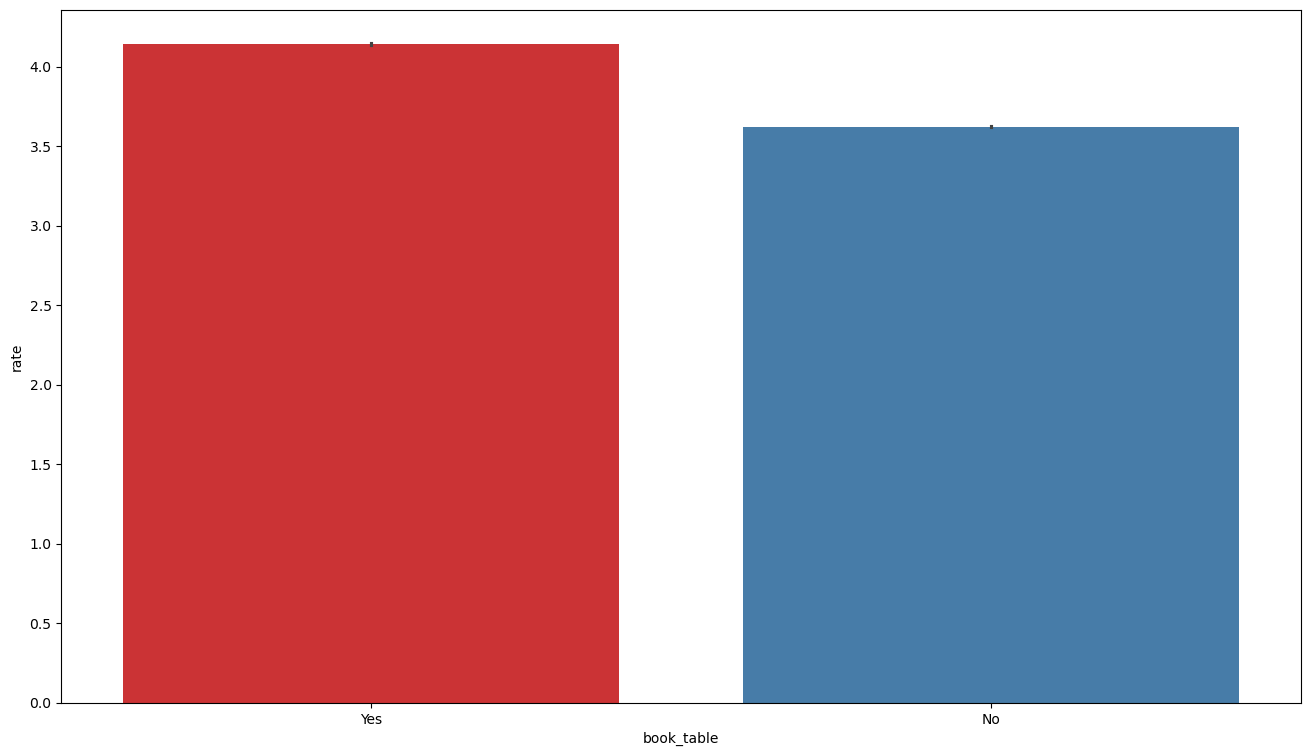

In [89]:
plt.figure(figsize=(16,9))
sns.barplot(x='book_table',y='rate',data=df,palette='Set1')

### The restaurant which allows for table booking has highest rating that is 4.1

### Percentage of Restaurants Ratings

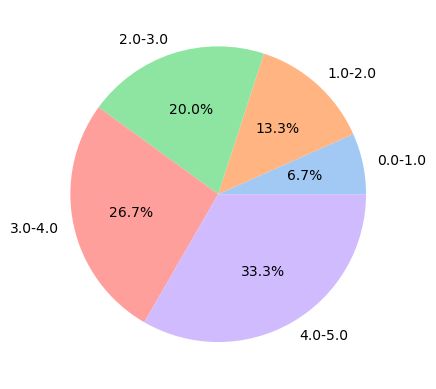

In [90]:
rate_percent = [1.0,2.0,3.0,4.0,5.0]
rate_range = (['0.0-1.0','1.0-2.0','2.0-3.0','3.0-4.0','4.0-5.0'])
plt.pie(x=rate_percent,labels=rate_range,autopct="%.1f%%",colors = sns.color_palette('pastel')[0:5])
plt.show()

## We can see that most of the customer has given the ratings between 4 to 5 that is 33% and only few have them rated between 1 to 2 that is 13.3%¶

Text(0.5, 0, 'Number of Outlets')

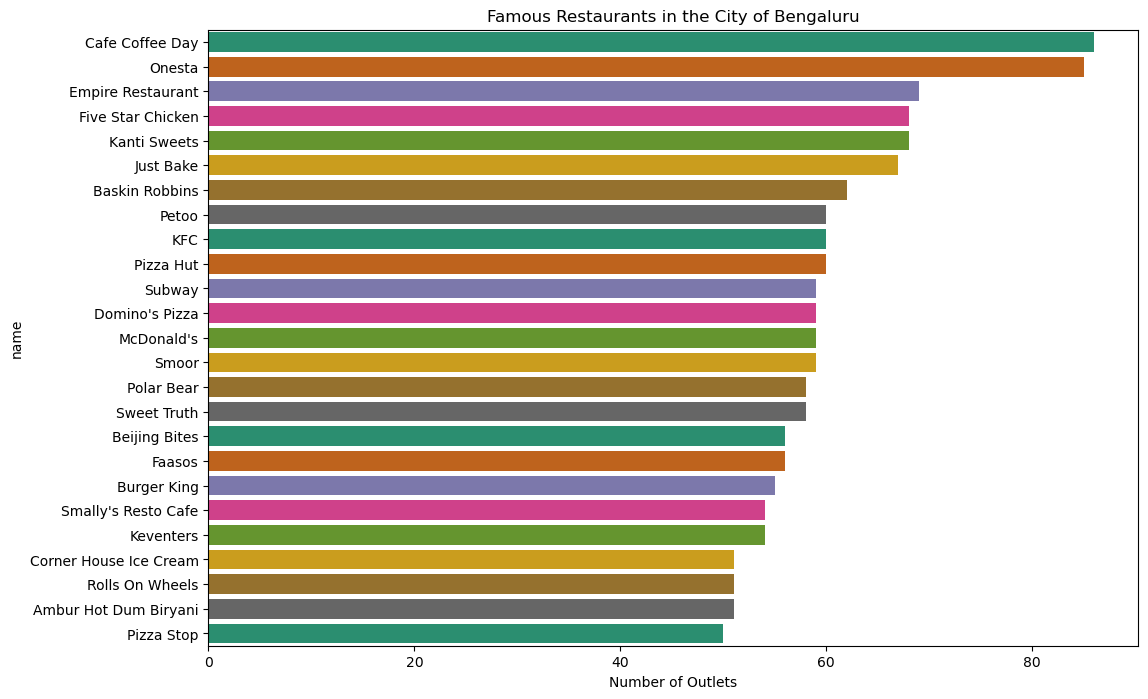

In [91]:
# Plotting for the Top Restuarant in the Bengaluru

plt.figure(figsize=(12,8))
val = df['name'].value_counts()[:25]  # Considering for the top 25 restaurants
sns.barplot(x=val, y=val.index, palette = "Dark2")
plt.title("Famous Restaurants in the City of Bengaluru")
plt.xlabel("Number of Outlets")

In [92]:
#visualizing online order facility,location wise by pivot table
df1=df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1=pd.read_csv('location_online.csv')
df1=pd.pivot_table(df1,values=None,index=['location'],columns=['online_order'],fill_value=0,aggfunc=np.sum)
df1

name      
online_order             No   Yes
location                         
BTM                    1016  2857
Banashankari            273   471
Banaswadi               171   292
Bannerghatta Road       396   828
Basavanagudi            183   412
Bellandur               331   665
Brigade Road            441   607
Brookefield             159   384
Church Street           212   331
Cunningham Road         156   318
Domlur                  188   218
Electronic City         364   468
Frazer Town             196   367
HSR                     334  1658
Indiranagar             539  1256
JP Nagar                560  1150
Jayanagar               402  1232
Kalyan Nagar            245   447
Kammanahalli            159   333
Koramangala 1st Block   152   699
Koramangala 4th Block   353   488
Koramangala 5th Block   770  1525
Koramangala 6th Block   408   644
Koramangala 7th Block   313   740
Lavelle Road            282   194
MG Road                 436   356
Malleshwaram            247   394
Marathahalli            446   961
New BEL Road            157   349
Old Airport Road        159   194
Rajajinagar             182   279
Residency Road          372   229
Richmond Road           378   225
Sarjapur Road           199   653
Shanti Nagar            173   193
St. Marks Road          176   167
Ulsoor                  296   547
Whitefield              612   956
others                 1708  2959

<Axes: xlabel='location'>

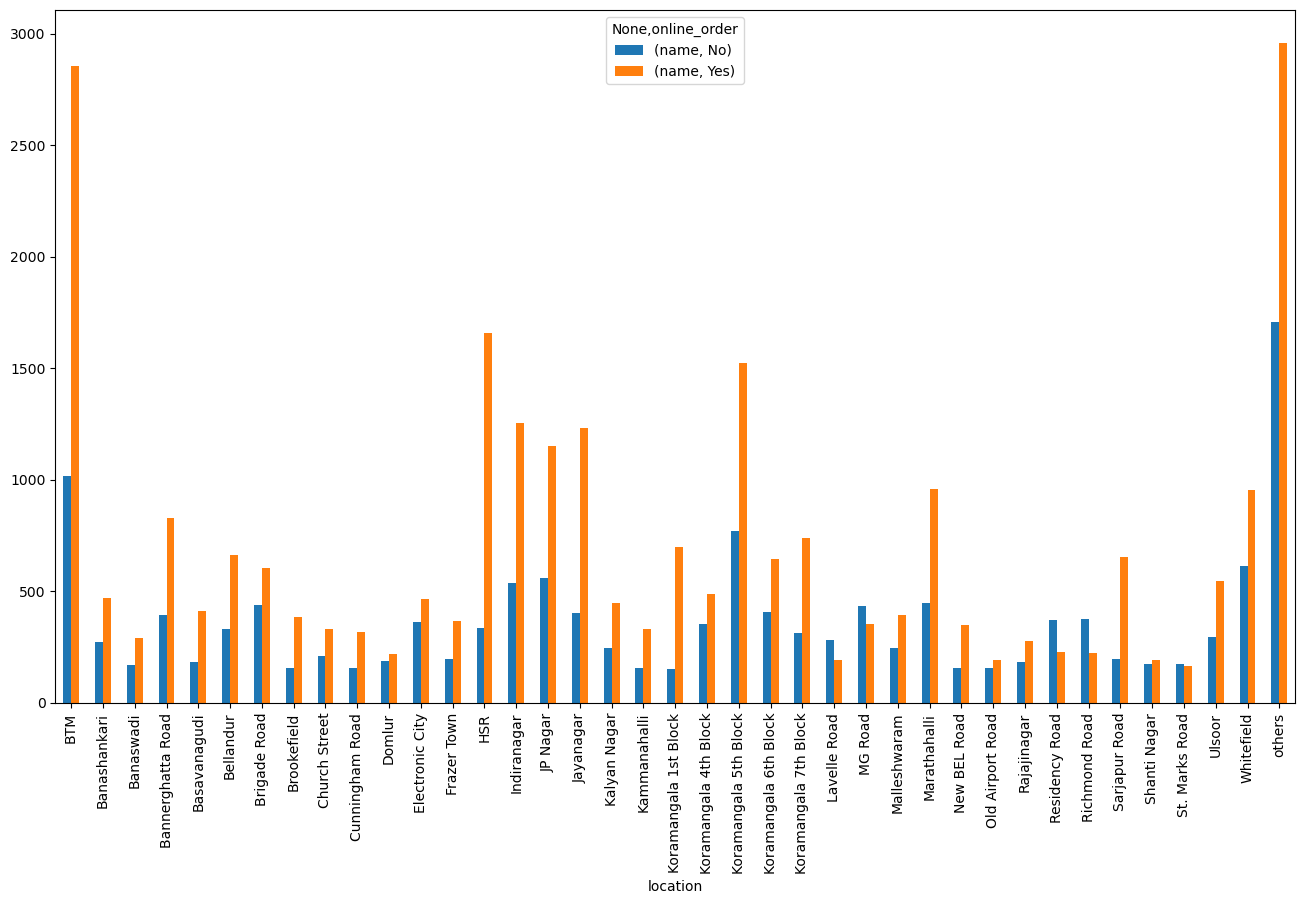

In [93]:
df1.plot(kind='bar',figsize=(16,9))

### we can see that btm have highest no.of online order facility

In [94]:
#visualizing book table facility,location wise

df2=df.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2=pd.read_csv('location_booktable.csv')
df2=pd.pivot_table(df2,values=None,index=['location'],columns=['book_table'],fill_value=0,aggfunc=np.sum)
df2

name     
book_table               No  Yes
location                        
BTM                    3719  154
Banashankari            691   53
Banaswadi               455    8
Bannerghatta Road      1126   98
Basavanagudi            579   16
Bellandur               898   98
Brigade Road            877  171
Brookefield             471   72
Church Street           362  181
Cunningham Road         299  175
Domlur                  351   55
Electronic City         736   96
Frazer Town             555    8
HSR                    1784  208
Indiranagar            1367  428
JP Nagar               1422  288
Jayanagar              1365  269
Kalyan Nagar            549  143
Kammanahalli            443   49
Koramangala 1st Block   801   50
Koramangala 4th Block   531  310
Koramangala 5th Block  1625  670
Koramangala 6th Block   940  112
Koramangala 7th Block   891  162
Lavelle Road            248  228
MG Road                 445  347
Malleshwaram            552   89
Marathahalli           1244  163
New BEL Road            450   56
Old Airport Road        294   59
Rajajinagar             420   41
Residency Road          452  149
Richmond Road           487  116
Sarjapur Road           699  153
Shanti Nagar            309   57
St. Marks Road          219  124
Ulsoor                  666  177
Whitefield             1316  252
others                 4277  390

<Axes: xlabel='location'>

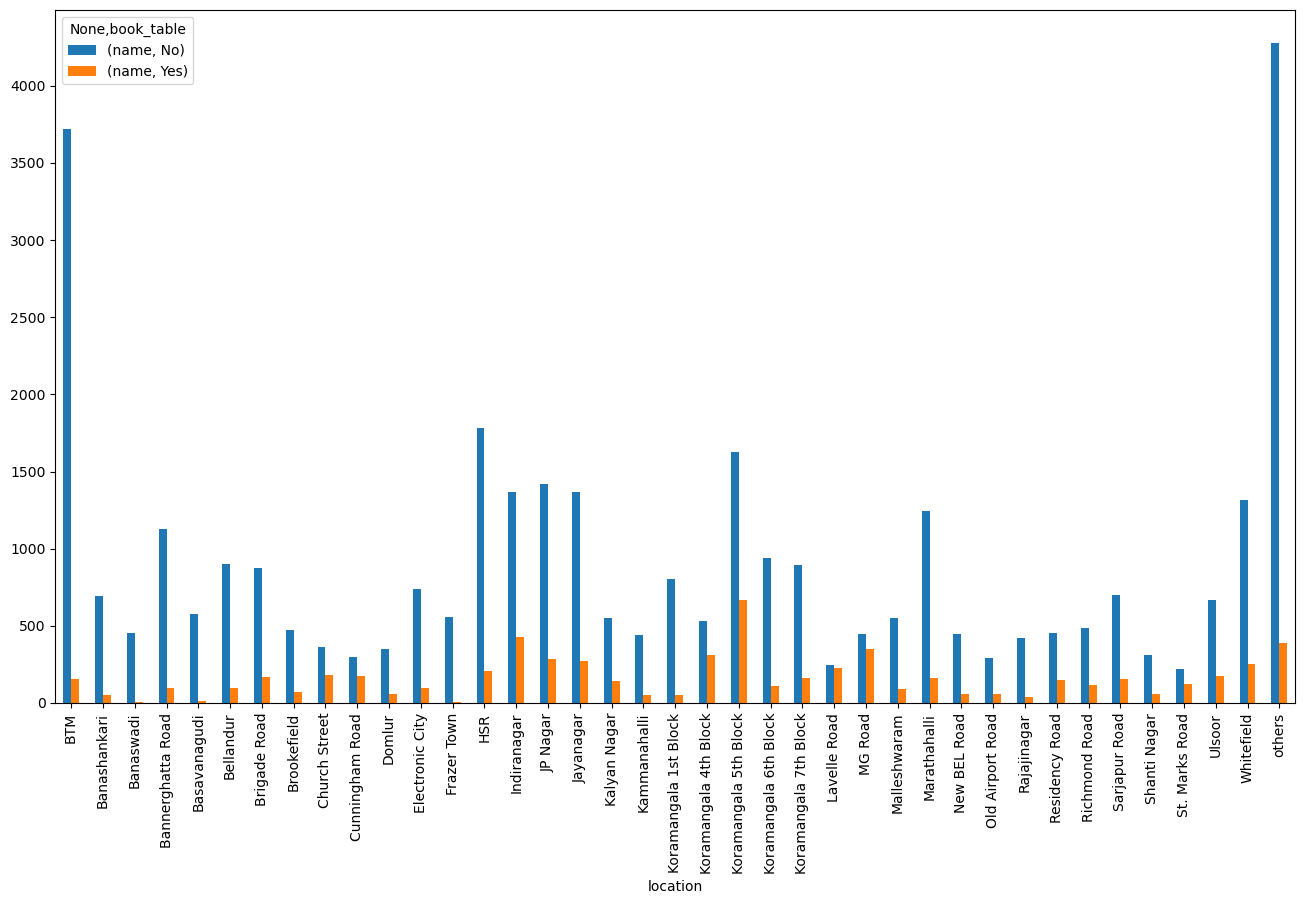

In [95]:
df2.plot(kind='bar',figsize=(16,9))

#### We can see that btm has highest no of restaurant that do not provide booking table facility & Koramangala 5th block has bit higher % of table booking facility compared to other location

In [96]:
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet


In [97]:
df.rest_type.value_counts()

rest_type
Quick Bites           13861
Casual Dining          9597
others                 8490
Cafe                   3365
Dessert Parlor         1848
Delivery               1666
Takeaway, Delivery     1276
Casual Dining, Bar     1087
Name: count, dtype: int64

In [98]:
df.groupby('rest_type')['rate'].mean()

rest_type
Cafe                  3.848113
Casual Dining         3.740450
Casual Dining, Bar    4.078381
Delivery              3.571429
Dessert Parlor        3.877652
Quick Bites           3.545913
Takeaway, Delivery    3.513950
others                3.821614
Name: rate, dtype: float64

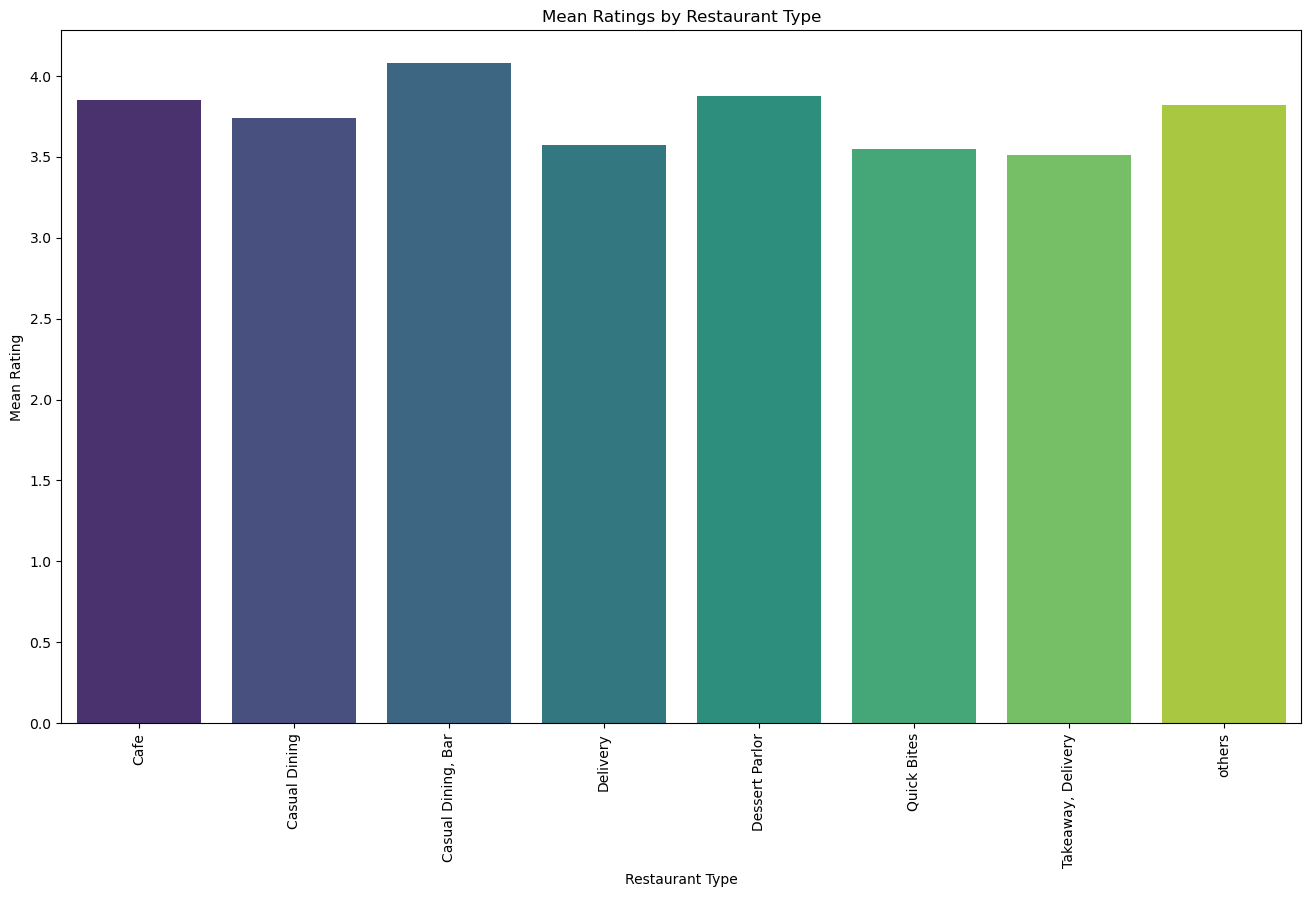

In [99]:
mean_ratings = df.groupby('rest_type')['rate'].mean().reset_index()

plt.figure(figsize=(16, 9))
ax = sns.barplot(x='rest_type', y='rate', data=mean_ratings,palette="viridis")
plt.xticks(rotation=90)
plt.title('Mean Ratings by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Mean Rating')
plt.show()

## Casual Dining, Bar has highest average rating

### Visualizing Top Cuisines

In [100]:
df3 = df[['cuisines', 'votes']]
df3.drop_duplicates()
df4 = df3.groupby(['cuisines'])['votes'].sum()
df4 = df4.to_frame()
df4 = df4.sort_values('votes', ascending=False)
df4.head()

,votes
cuisines,
others,11600891
North Indian,516306
"North Indian, Chinese",258225
South Indian,161645
"North Indian, Mughlai",103706


### According to the above analysis we can see that North indian meals and chinese has highest votings 

<Axes: xlabel='Type', ylabel='rate'>

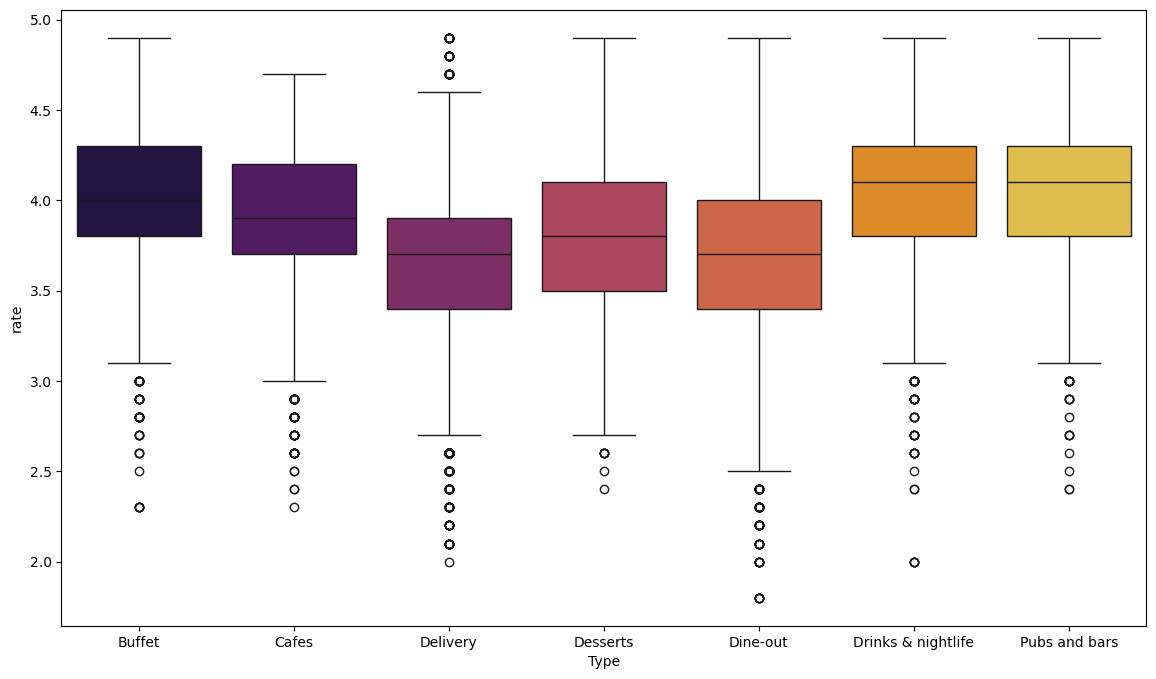

In [101]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Type', y = 'rate', data = df, palette = 'inferno',orient='v')

### Now will perform Encoding Technique

In [102]:
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'Cost2plates', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df
df_en = Encode(df.copy())

In [103]:
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet


In [104]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41190 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41190 non-null  int64  
 1   online_order  41190 non-null  int64  
 2   book_table    41190 non-null  int64  
 3   rate          41190 non-null  float64
 4   votes         41190 non-null  int64  
 5   location      41190 non-null  int64  
 6   rest_type     41190 non-null  int64  
 7   cuisines      41190 non-null  int64  
 8   Cost2plates   41190 non-null  float64
 9   Type          41190 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 3.5 MB


In [105]:
df_en.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,0,0,0,4.1,775,0,0,0,800.0,0
1,1,0,1,4.1,787,0,0,0,800.0,0
2,2,0,1,3.8,918,0,1,0,800.0,0
3,3,1,1,3.7,88,0,2,1,300.0,0
4,4,1,1,3.8,166,1,0,0,600.0,0


### Model Building

### Splitting the dataset

In [106]:
from sklearn.model_selection import train_test_split
#Defining the independent variables and dependent variables
x=df_en.drop(["rate"], axis=1) #modified
y = df_en['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
x_train.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,Cost2plates,Type
15926,7,0,0,3764,11,1,0,600.0,2
44521,1173,0,1,336,38,2,0,500.0,4
35264,3350,0,1,5,9,1,44,150.0,2
22550,929,0,1,35,6,2,23,300.0,2
4083,1617,0,1,536,17,4,60,600.0,2


In [107]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test) 

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.30428942340106657

In [108]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor()
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

r2_score(y_test,y_predict)

0.9398852675974289

In [109]:
from sklearn.tree import DecisionTreeRegressor

DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8527694388681485

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_predict=gbr.predict(x_test)
r2_score(y_test,y_predict)

0.5316330504999836

In [111]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(x_train, y_train)
y_predict=xgb.predict(x_test)

r2_score(y_test,y_predict)

0.7940073156031697

In [112]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.13776797694933013
Mean Squared Error: 0.039022208882285504
Root Mean Squared Error: 0.1975403981019718


In [113]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest','Gradient Boost', 'XgBoost'],
    'Score' : [reg.score(x_test, y_test),  DTree.score(x_test, y_test), RForest.score(x_test, y_test),
               gbr.score(x_test, y_test), xgb.score(x_test, y_test)]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest,0.939885
1,Decision Tree,0.852769
4,XgBoost,0.794007
3,Gradient Boost,0.531633
0,Linear Regression,0.304289


### We can see the best model is Random Forest -  So will perform hyperparameter tuning technique for it

In [114]:
from sklearn.model_selection import RandomizedSearchCV
random_search = {'n_estimators' : [100, 120, 150, 180, 200,220,250],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20],
                 'min_samples_split' : [2, 5, 10, 15, 100],
                 'min_samples_leaf' : [1, 2, 5, 10]}
rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_search,
                            cv=3,random_state=0)
rf_model.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220, 250]},
                   random_state=0)

In [115]:
# best parameter
best_params = rf_model.best_params_

In [116]:
rf_regressor=RandomForestRegressor(**best_params)

rf_regressor.fit(x_train, y_train)

y_train_pred=rf_regressor.predict(x_train)

In [118]:
y_test_pred = rf_regressor.predict(x_test)

### Model Evaluation

In [119]:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9187803686814764
0.8555930039987198


#### we can also perform Random Forest Feature Selection technique

Feature Importances:
name: 0.1335077097719747
online_order: 0.01593439750376305
book_table: 0.0820743154714954
votes: 0.438535771345108
location: 0.08484721833506681
rest_type: 0.05260126261332778
cuisines: 0.057679696097785574
Cost2plates: 0.12414934410132072
Type: 0.010670284760157942


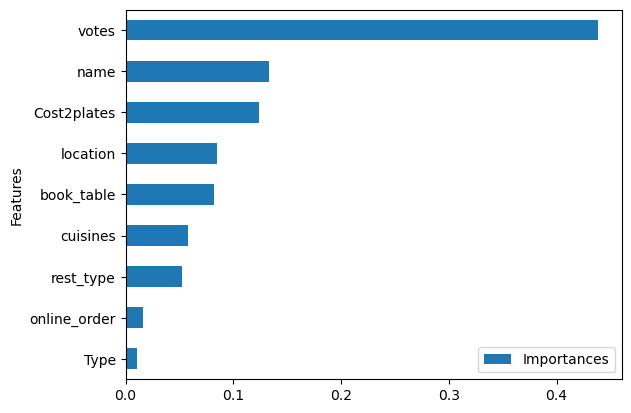

In [120]:
# Get the feature importances
importances = rf_regressor.feature_importances_
feature_names = x.columns

# Print the feature importances
print("Feature Importances:")
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance}")

# Creating a dataframe for visualization
final_df = pd.DataFrame({'Features':feature_names,"Importances":importances})
final_df.set_index('Features',inplace=True)
sorted_importances = final_df.sort_values(by = 'Importances')
sorted_importances.plot(kind='barh')
plt.show()

### will try to build model using first 6 columns

In [121]:
new_x_train = x_train[['votes','location','Cost2plates']]

In [122]:
new_x_test = x_test[['votes','location','Cost2plates']]

In [123]:
new_rf_regressor=RandomForestRegressor(**best_params)
new_rf_regressor.fit(new_x_train, y_train)
new_y_train_pred=new_rf_regressor.predict(new_x_train)
new_y_test_pred=new_rf_regressor.predict(new_x_test)

In [124]:
print(r2_score(y_train,new_y_train_pred))
print(r2_score(y_test,new_y_test_pred))

0.8626628662420975
0.7908439336848099


## Key Findings & Insights:

A. Restaurant Distribution & Competition:
    
* Bangalore has a high concentration of restaurants, particularly in areas like BTM Layout, Koramangala, and Indiranagar.
* The market is highly competitive, making it challenging for new restaurants to establish themselves.

B. Online Orders & Table Booking Influence on Ratings:

* Restaurants that offer online ordering have an average rating of 3.72, while those without have 3.65.
* Restaurants offering table booking services also receive higher ratings compared to those that do not, indicating that customers value the convenience of reservations.
* Restaurants that allow table booking have an average rating of 4.14, compared to 3.62.
  

C. Cost Influence on Restaurant Popularity:

* The average cost for two varies widely, from as low as ₹100 to as high as ₹6000.
* Mid-range restaurants (₹500-₹800) are the most common and attract the highest number of reviews

D. Customer Preferences in Cuisine & Dishes:

* The most preferred dishes include Pasta (3409 mentions), Burgers (3024), Cocktails (2832), Pizza (2737), and Biryani (2092).
* North Indian, Chinese, and South Indian cuisines dominate the market

E. Top Performing Restaurant Types:

* Quick Bites (13,861 restaurants) and Casual Dining (9,597) are the most common restaurant types.
* Fine dining, bars, and bakeries have relatively fewer outlets but may cater to niche customers

## Business Insights:

1. Customer Behavior & Preferences:

* Customers prefer restaurants that allow online ordering and table booking.
* Highly rated restaurants tend to have strong customer engagement through reviews and ratings.

2. Key Growth Areas:

* Locations with fewer restaurants, such as Old Airport Road and St. Marks Road, provide opportunities for new businesses.
* Establishing a strong online presence (Zomato, Swiggy) can help in attracting more customers.

3. Impact of Ratings & Reviews:

* High-rated restaurants gain better visibility on Zomato, attracting more customers.
* Engaging with customers through review responses can improve restaurant perception.

4. Cuisine Trends:

* North Indian and Chinese cuisines remain the most popular.
* Fast food items (Burgers, Pizza, Pasta) are in high demand, indicating a shift toward quick, convenient meals.


### Recommendations:

1.	For New Restaurants:

  
    *	Strategic Location Selection: Avoid oversaturated areas and consider expanding into emerging locations with lower competition.
    
    *	Menu Optimization: Include popular dishes like Pasta, Pizza, and Biryani to attract a broader customer base.
    
    *	Online & Table Booking Services: Ensure the availability of these services to enhance customer convenience and ratings.

3.	For Existing Restaurants:

    *	Improve Ratings & Engagement: Encourage customers to leave positive reviews and address feedback proactively.
    
    *	Optimize Pricing: Set competitive pricing in the mid-range segment to align with customer preferences.
    
    	Enhance Customer Experience: Implement loyalty programs, better service, and faster delivery options to retain customers.

4.	For Zomato & Online Platforms:

    *	Enhance Data Collection: Improve accuracy in features like "disliked" to provide better recommendations.
    
    *	Support New Restaurants: Offer promotional visibility for restaurants in less competitive locations.
    
    *	Focus on Mobile & Online Growth: Strengthen mobile app features for better integration of online orders, loyalty programs, and customer     feedback.


### Conclusion:
Bangalore's restaurant industry is highly competitive, with a strong demand for online ordering, mid-range dining, and popular fast-food items. Restaurants can gain a competitive edge by focusing on customer engagement, online presence, service quality, and menu optimization. Selecting the right location and implementing customer-centric strategies can help businesses thrive in this dynamic market.
